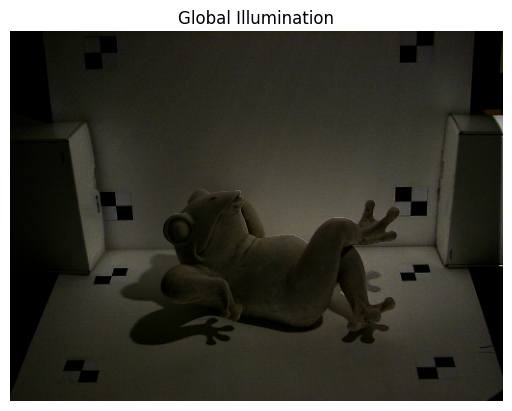

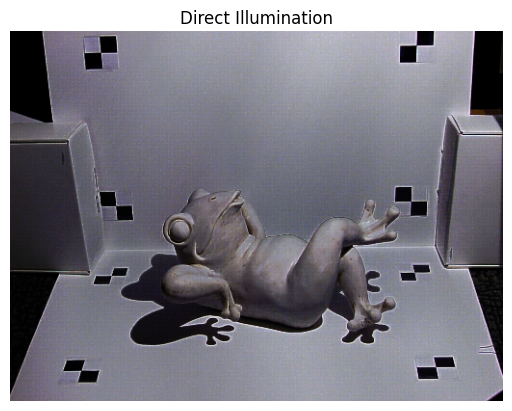

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

@np.vectorize
def srgb2lin(s):
    if s <= 0.0404482362771082:
        return s / 12.92
    else:
        return ((s + 0.055) / 1.055) ** 2.4

@np.vectorize
def lin2srgb(l):
    if l > 0.0031308:
        return 1.055 * (l ** (1.0 / 2.4)) - 0.055
    else:
        return 12.92 * l

def load_images(img_root):
    files = sorted([f for f in os.listdir(img_root) if f.endswith('.jpg')])
    images = []
    for fl in files:
        img = cv2.imread(os.path.join(img_root, fl))[::2, ::2]  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0     
        images.append(img)
    return np.array(images)

def separate_direct_indirect(images_lin):
    im_max = np.max(images_lin, axis=0)  
    im_min = np.min(images_lin, axis=0)  
    im_dir = im_max - im_min             
    im_glo = im_min                      
    return im_dir, im_glo

if __name__ == "__main__":
    img_root = '/Users/revanthvarma/Library/Mobile Documents/com~apple~CloudDocs/15663_CP/assgn6/data/frog/'  
    images = load_images(img_root)

    images_lin = srgb2lin(images)

    im_dir, im_glo = separate_direct_indirect(images_lin)

    plt.figure()
    plt.imshow(im_glo)
    plt.title('Global Illumination')
    plt.axis('off')
    plt.show()

    plt.figure()
    plt.imshow(im_dir)
    plt.title('Direct Illumination')
    plt.axis('off')
    plt.show()


Found files: ['frame1000.png', 'frame1001.png', 'frame1002.png', 'frame1003.png', 'frame1004.png', 'frame1005.png', 'frame1006.png', 'frame1007.png', 'frame1008.png', 'frame1009.png', 'frame1010.png', 'frame1011.png', 'frame1012.png', 'frame1013.png', 'frame1014.png', 'frame1015.png', 'frame1016.png', 'frame1017.png', 'frame1018.png', 'frame1019.png', 'frame1020.png', 'frame1021.png', 'frame1022.png', 'frame1023.png', 'frame1024.png', 'frame1025.png', 'frame1026.png', 'frame1027.png', 'frame1028.png', 'frame1029.png', 'frame1030.png', 'frame1031.png', 'frame1032.png', 'frame1033.png', 'frame1034.png', 'frame1035.png', 'frame1036.png', 'frame1037.png', 'frame1038.png', 'frame1039.png', 'frame1040.png', 'frame1041.png', 'frame1042.png', 'frame1043.png', 'frame1044.png', 'frame1045.png', 'frame1046.png', 'frame1047.png', 'frame1048.png', 'frame1049.png', 'frame1050.png', 'frame1051.png', 'frame1052.png', 'frame1053.png', 'frame1054.png', 'frame1055.png', 'frame1056.png', 'frame1057.png', 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


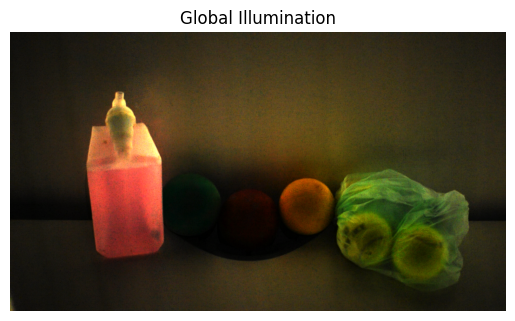

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


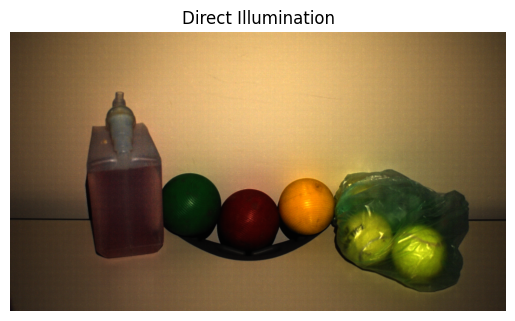

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def srgb_to_linear(img):
    threshold = 0.0404482362771082
    low_l = img / 12.92
    high_l = ((img + 0.055) / 1.055)**2.4
    return np.where(img <= threshold, low_l, high_l)

def load_and_compute_min_max(img_root, file_ext='.png'):
    files = sorted([f for f in os.listdir(img_root) if f.lower().endswith(file_ext)])
    print("Found files:", files)

    if len(files) == 0:
        print("No images found. Please check your directory or file extensions.")
        return None, None

    im_min = None
    im_max = None

    for i, fl in enumerate(files):
        img_path = os.path.join(img_root, fl)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: {fl} could not be read.")
            continue
        img = img[::2, ::2]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32) / 255.0
        img_lin = srgb_to_linear(img)

        if im_min is None:
            im_min = np.copy(img_lin)
            im_max = np.copy(img_lin)
        else:
            im_min = np.minimum(im_min, img_lin)
            im_max = np.maximum(im_max, img_lin)

    return im_min, im_max

def separate_direct_indirect(im_min, im_max):
    im_dir = im_max - im_min
    im_glo = im_min
    return im_dir, im_glo

if __name__ == "__main__":
    img_root = "/Users/revanthvarma/Library/Mobile Documents/com~apple~CloudDocs/15663_CP/assgn6/data/fruits"
    im_min, im_max = load_and_compute_min_max(img_root, file_ext='.png')

    if im_min is None or im_max is None:
        exit(1)

    im_dir, im_glo = separate_direct_indirect(im_min, im_max)

    plt.figure()
    plt.imshow(im_glo*12)
    plt.title('Global Illumination')
    plt.axis('off')
    plt.show()

    plt.figure()
    plt.imshow(im_dir*3)
    plt.title('Direct Illumination')
    plt.axis('off')
    plt.show()
